<a href="https://colab.research.google.com/github/yonyusarang/AI-contents/blob/main/%EC%BD%94%EB%94%A9%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%9C%B5%ED%95%A9%EA%B5%90%EC%9C%A1_%EC%BD%98%ED%85%90%EC%B8%A0_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
from datetime import datetime, timedelta
import pandas as pd
import json

In [ ]:
today = str(datetime.now().date()); today

# api token
client_id = "RSMAbsHA_bRp42DpxRkW" 
client_secret = "jQRjLmlz59"

In [ ]:
url = "https://openapi.naver.com/v1/datalab/search"
body = "{\"startDate\":\"2022-03-01\",\"endDate\":\""+today+"\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"감기\",\"keywords\":[\"감기\"]},{\"groupName\":\"독감\",\"keywords\":[\"독감\"]},{\"groupName\":\"폐렴\",\"keywords\":[\"폐렴\"]},{\"groupName\":\"장염\",\"keywords\":[\"장염\"]}]}";

requested = urllib.request.Request(url)
requested.add_header("X-Naver-Client-Id", client_id)
requested.add_header("X-Naver-Client-Secret", client_secret)
requested.add_header("Content-Type", "application/json")
response = urllib.request.urlopen(requested, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    output_data = response_body.decode('utf-8')
else:
    print('Error code:'+ rescode)


result = json.loads(output_data)

In [ ]:
date = [a['period'] for a in result['results'][0]['data']]

a_ratio = [a['ratio'] for a in result['results'][0]['data']]
b_ratio = [a['ratio'] for a in result['results'][1]['data']]
c_ratio = [a['ratio'] for a in result['results'][2]['data']]
d_ratio = [a['ratio'] for a in result['results'][3]['data']]

pd.DataFrame({'date':date, 
              'a':a_ratio,
              'b':b_ratio,
              'c':c_ratio,
              'd':d_ratio})

,date,a,b,c,d
0,2022-03-01,22.22611,19.10604,29.41279,34.05784
1,2022-03-02,21.31463,21.57756,36.14373,37.38825
2,2022-03-03,21.85801,20.73619,36.89745,33.58457
3,2022-03-04,21.73531,21.50744,39.56178,32.02453
4,2022-03-05,20.15775,18.01928,33.40929,26.31025
5,2022-03-06,21.05170,20.59596,28.29097,29.32515
6,2022-03-07,23.45311,24.32953,43.59333,38.43996
7,2022-03-08,22.08588,21.56003,42.52410,32.02453
8,2022-03-09,19.12357,19.10604,33.47940,23.22524
9,2022-03-10,22.31375,23.78615,43.71603,32.86590


In [ ]:
dates=[] 
a_queries=[] 
for i in result['results'][0]['data']:
  dates.append(i['period']) 
  a_queries.append(i['ratio'])

b_queries=[] 
for i in result['results'][1]['data']:
  b_queries.append(i['ratio'])

c_queries=[] 
for i in result['results'][2]['data']:
  c_queries.append(i['ratio'])


df=pd.DataFrame([dates, a_queries, b_queries, c_queries]).T
df.columns=['Date', 'a', 'b', 'c']

In [ ]:
print(df)

          Date         a         b         c
0   2022-03-01  22.22611  19.10604  29.41279
1   2022-03-02  21.31463  21.57756  36.14373
2   2022-03-03  21.85801  20.73619  36.89745
3   2022-03-04  21.73531  21.50744  39.56178
4   2022-03-05  20.15775  18.01928  33.40929
5   2022-03-06   21.0517  20.59596  28.29097
6   2022-03-07  23.45311  24.32953  43.59333
7   2022-03-08  22.08588  21.56003   42.5241
8   2022-03-09  19.12357  19.10604   33.4794
9   2022-03-10  22.31375  23.78615  43.71603
10  2022-03-11  22.55915   24.0666  49.00964
11  2022-03-12  22.92725  21.31463   41.2971
12  2022-03-13  23.38299  22.26117   41.6652
13  2022-03-14  27.18667  26.29272  55.61787
14  2022-03-15   25.1709  26.69588  53.02366
15  2022-03-16  24.94303  30.88518  57.26555
16  2022-03-17  23.17265   26.7134  60.77125
17  2022-03-18  23.92638  22.82208  55.21472
18  2022-03-19  21.96319  17.14285  44.83786
19  2022-03-20  20.12269  17.30061  40.59596
20  2022-03-21  22.43645  20.28045  58.31726
21  2022-0

Text(0.5, 1.0, 'trend')

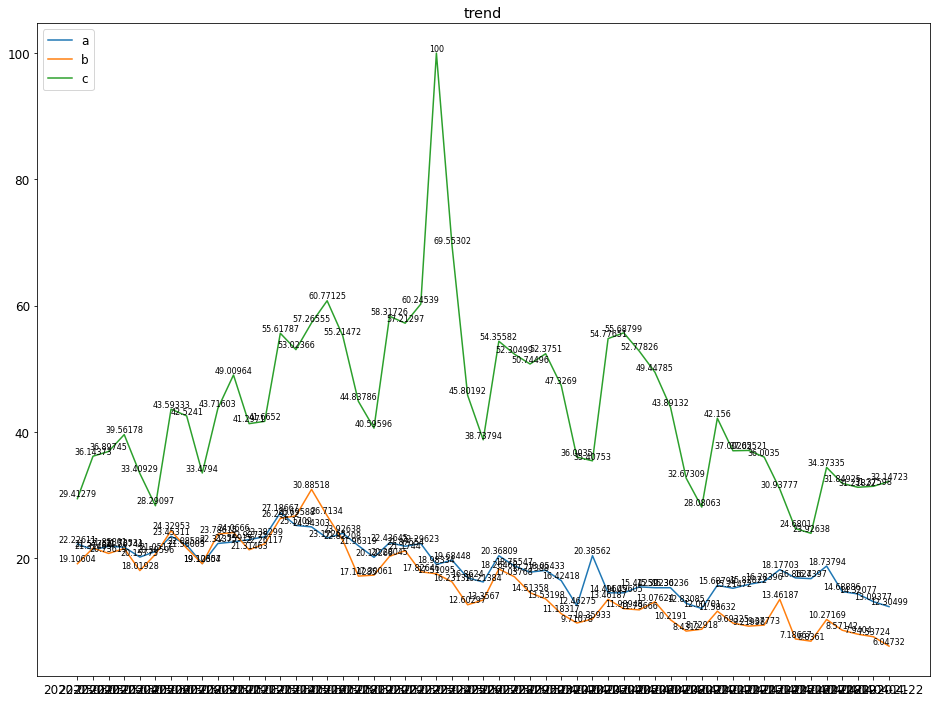

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] =12 
plt.figure(figsize=(16,12))

plt.plot(df['Date'],df['a']) 
for i in range(len(df)):
  plt.text(i,df['a'][i],df['a'][i],fontsize=8, horizontalalignment='center',verticalalignment='bottom')

plt.plot(df['Date'],df['b']) 
for i in range(len(df)):
  plt.text(i,df['b'][i],df['b'][i],fontsize=8, horizontalalignment='center', verticalalignment='bottom')

plt.plot(df['Date'],df['c']) 
for i in range(len(df)):
  plt.text(i,df['c'][i],df['c'][i],fontsize=8, horizontalalignment='center', verticalalignment='bottom')


plt.legend(['a', 'b', 'c'], loc='upper left')
plt.title('trend')
